In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette('coolwarm')
sns.set_style('darkgrid')

In [2]:
train = pd.read_csv('ForestCoverType_train.csv')
test = pd.read_csv('ForestCoverType_test.csv')

In [3]:
data = [train, test]
for df in data:
    df.loc[df['Vertical_Distance_To_Hydrology'] == -146, 'Vertical_Distance_To_Hydrology'] = np.nan

In [4]:
for df in data:
    df['Vertical_Distance_To_Hydrology'].fillna(df['Vertical_Distance_To_Hydrology'].mean())

In [5]:
test_id = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>],
       [<AxesSubplot:title={'center':'Hillshade_9am'}>,
        <AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>],
       [<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:title={'center':'Cover_Type'}>, <AxesSubplot:>]],
      dtype=object)

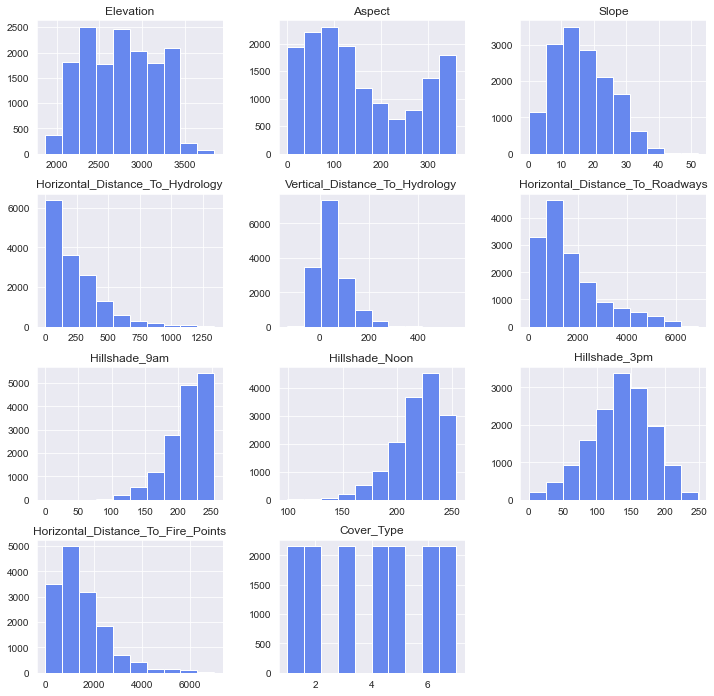

In [6]:
features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type']
plt.rc('font', size = 10)
train[features].hist(figsize = (12, 12))

In [7]:
def onehot_to_label(df, column, count):
    df[column] = 0
    for i in range(df.shape[0]):
        for j in range(1, count+1):
            if df.loc[i, '{}{}'.format(column, j)] == 1:
                df.loc[i, column] = j

In [8]:
onehot_to_label(train, 'Wilderness_Area', 4)
onehot_to_label(train, 'Soil_Type', 40)

In [9]:
# for i in range(1, 41):
#     col = '{}{}'.format('Soil_Type', i)
#     if col in train.columns:
#         train.drop(col, axis = 1, inplace = True)
# for i in range(1, 5):
#     col = '{}{}'.format('Wilderness_Area', i)
#     if col in train.columns:
#         train.drop('{}{}'.format('Wilderness_Area', i), axis = 1, inplace = True)

<AxesSubplot:>

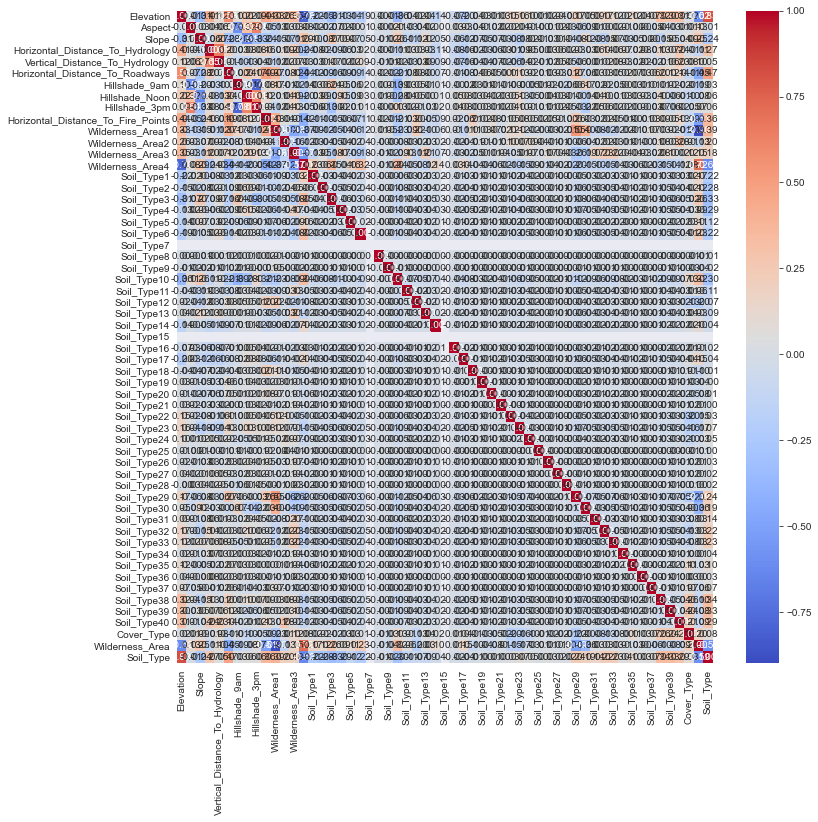

In [10]:
plt.figure(figsize = (12, 12))
sns.heatmap(train[features].corr(), fmt = '.2f', annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

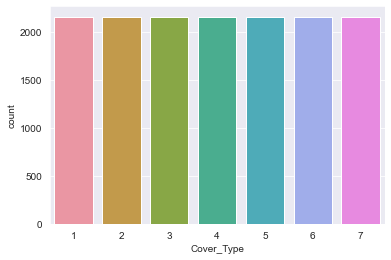

In [11]:
sns.countplot(data = train, x = 'Cover_Type')

In [12]:
# Elevation is that Soil_Type correlation is bigger than 0.8, Therefore delete
for df in data:
    df.drop('Elevation', inplace = True, axis = 1)

In [13]:
train['Hillshade_3pm'].value_counts()

143    182
149    161
132    156
133    154
142    154
      ... 
248      2
1        1
4        1
7        1
8        1
Name: Hillshade_3pm, Length: 247, dtype: int64

In [14]:
#outlier delete
train.drop(train[train['Horizontal_Distance_To_Fire_Points'] > 4000].index, axis = 0, inplace = True)
train.drop(train[train['Hillshade_Noon'] < 150].index, axis = 0, inplace = True)
train.drop(train[train['Hillshade_9am'] < 100].index, axis = 0, inplace = True)
train.drop(train[train['Vertical_Distance_To_Hydrology'] > 200].index, axis = 0, inplace = True)
train.drop(train[train['Horizontal_Distance_To_Hydrology'] > 750].index, axis = 0, inplace = True)
train.drop(train[train['Vertical_Distance_To_Hydrology'] < 0].index, axis = 0, inplace = True)

array([[<AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>],
       [<AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>,
        <AxesSubplot:title={'center':'Hillshade_9am'}>],
       [<AxesSubplot:title={'center':'Hillshade_Noon'}>,
        <AxesSubplot:title={'center':'Hillshade_3pm'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>],
       [<AxesSubplot:title={'center':'Cover_Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

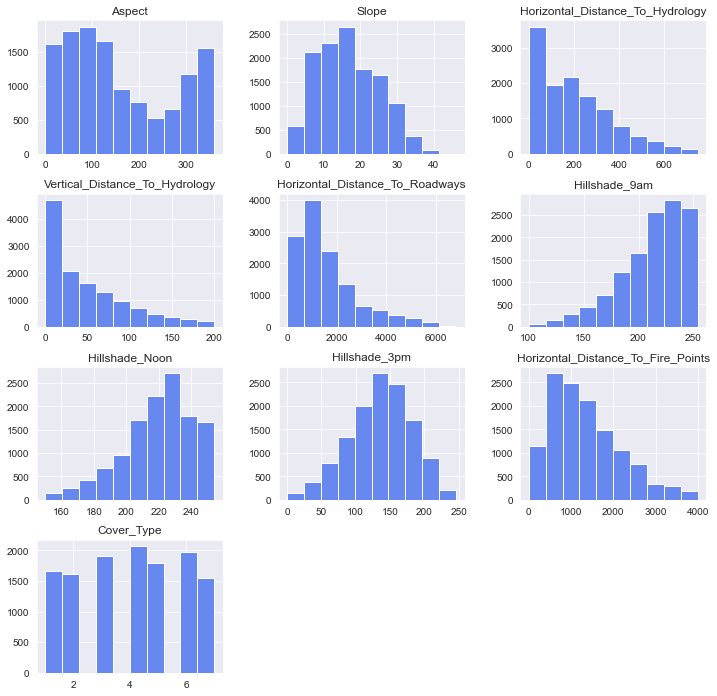

In [15]:
features.remove('Elevation')
plt.rc('font', size = 10)
train[features].hist(figsize = (12, 12))

<AxesSubplot:>

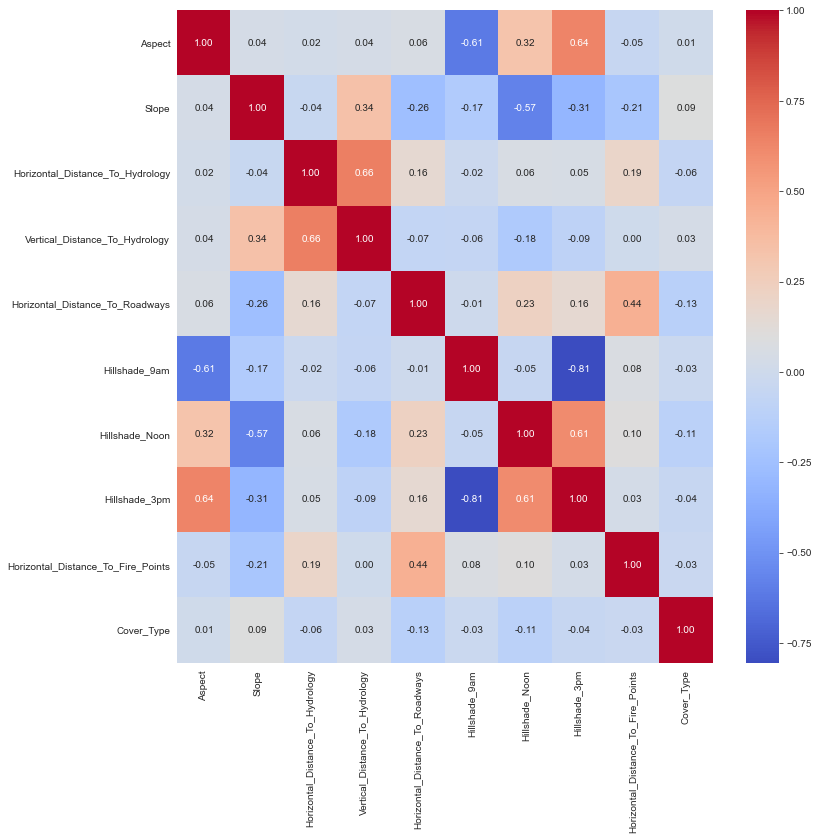

In [16]:
plt.figure(figsize = (12, 12))
sns.heatmap(train[features].corr(), fmt = '.2f', annot = True, cmap = 'coolwarm')

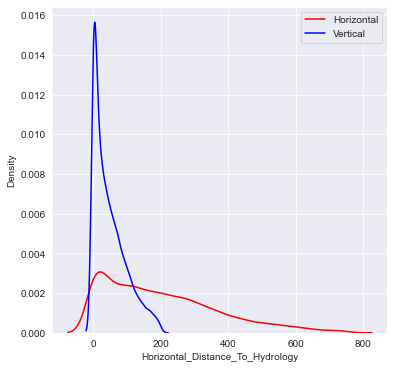

In [17]:
plt.figure(figsize = (6, 6))
sns.kdeplot(train['Horizontal_Distance_To_Hydrology'], label = 'Horizontal', color = 'red')
sns.kdeplot(train['Vertical_Distance_To_Hydrology'], label = 'Vertical', color = 'blue')
plt.legend()

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology', ylabel='Vertical_Distance_To_Hydrology'>

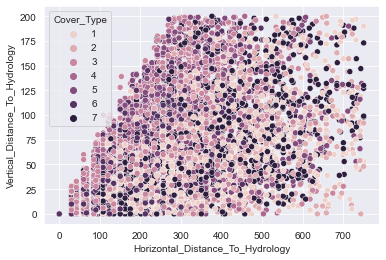

In [18]:
sns.scatterplot(x = 'Horizontal_Distance_To_Hydrology', y = 'Vertical_Distance_To_Hydrology', data = train,
           hue = 'Cover_Type')

In [19]:
train['Hyd_Mul'] = (train['Horizontal_Distance_To_Hydrology'] + 1) * (train['Vertical_Distance_To_Hydrology'] + 1)
test['Hyd_Mul'] = (test['Horizontal_Distance_To_Hydrology'] + 1) * (test['Vertical_Distance_To_Hydrology'] + 1)

<AxesSubplot:>

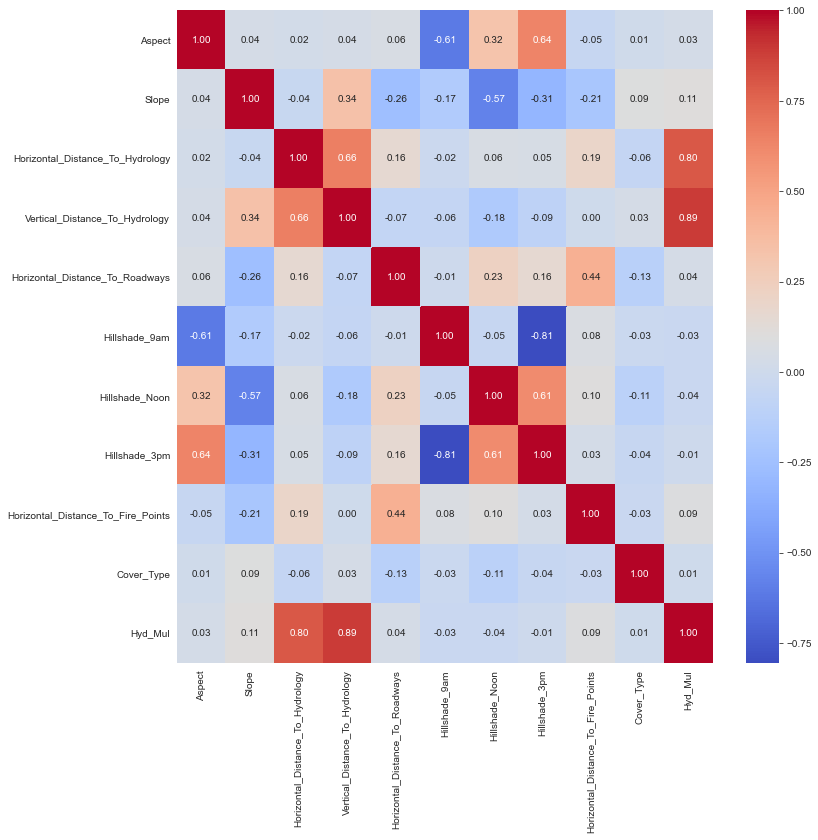

In [20]:
features.append('Hyd_Mul')
plt.figure(figsize = (12, 12))
sns.heatmap(train[features].corr(), fmt = '.2f', annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Hillshade_3pm', ylabel='Hillshade_9am'>

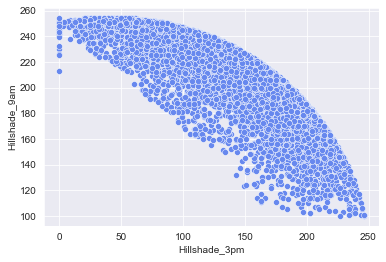

In [21]:
sns.scatterplot(x = 'Hillshade_3pm', y = 'Hillshade_9am', data = train)

In [22]:
#outlier
train.drop(train[((train['Hillshade_9am'] < 240) & (train['Hillshade_3pm'] < 5))].index, inplace = True)

<AxesSubplot:xlabel='Hillshade_3pm', ylabel='Hillshade_9am'>

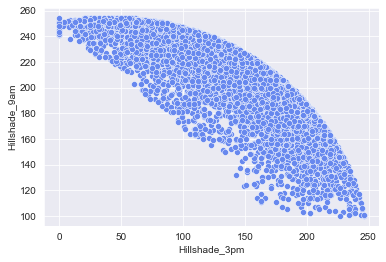

In [23]:
sns.scatterplot(x = 'Hillshade_3pm', y = 'Hillshade_9am', data = train)

In [24]:
for df in data:
    df['Hill_Div_9am_3pm'] = (df['Hillshade_9am'] + 1) / (df['Hillshade_3pm'] + 1)

<AxesSubplot:>

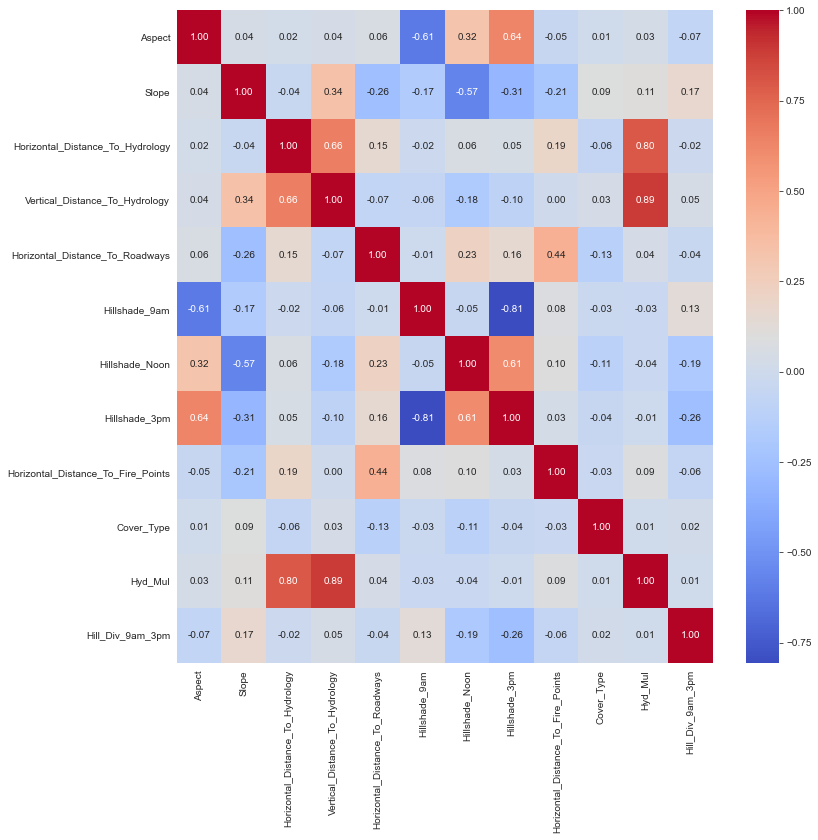

In [25]:
features.append('Hill_Div_9am_3pm')
plt.figure(figsize = (12, 12))
sns.heatmap(train[features].corr(), fmt = '.2f', annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Hillshade_3pm', ylabel='Hillshade_Noon'>

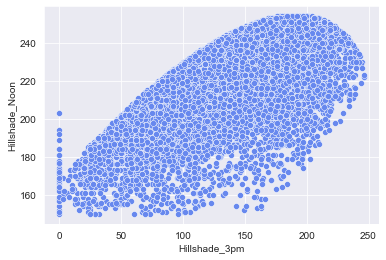

In [26]:
sns.scatterplot(x = 'Hillshade_3pm', y = 'Hillshade_Noon', data = train)

In [27]:
train.drop(train[train['Hillshade_3pm'] == 0].index, inplace = True)

<AxesSubplot:xlabel='Hillshade_3pm', ylabel='Hillshade_Noon'>

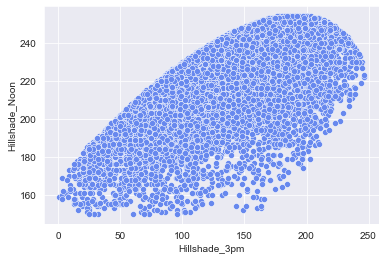

In [28]:
sns.scatterplot(x = 'Hillshade_3pm', y = 'Hillshade_Noon', data = train)

In [29]:
for df in data:
    df['Hill_Mul_3pm_Noon'] = df['Hillshade_3pm'] * df['Hillshade_Noon']
features.append('Hill_Mul_3pm_Noon')

<AxesSubplot:xlabel='Aspect', ylabel='Hillshade_3pm'>

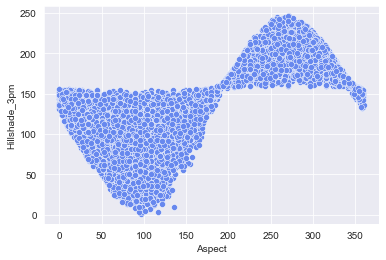

In [30]:
sns.scatterplot(x = 'Aspect', y = 'Hillshade_3pm', data = train)

<AxesSubplot:xlabel='Aspect', ylabel='Hillshade_Noon'>

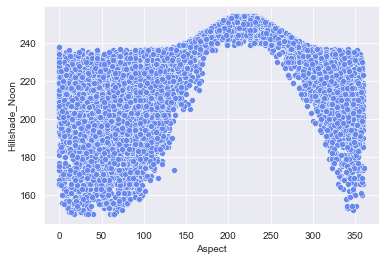

In [31]:
sns.scatterplot(x = 'Aspect', y = 'Hillshade_Noon', data = train)

In [32]:
for df in data:
    df['Hill_Mul_As_Noon'] = df['Aspect'] * df['Hillshade_Noon']
    df['Hill_Mul_As_3pm'] = df['Aspect'] * df['Hillshade_3pm']

features.append('Hill_Mul_As_Noon')
features.append('Hill_Mul_As_3pm')

<AxesSubplot:>

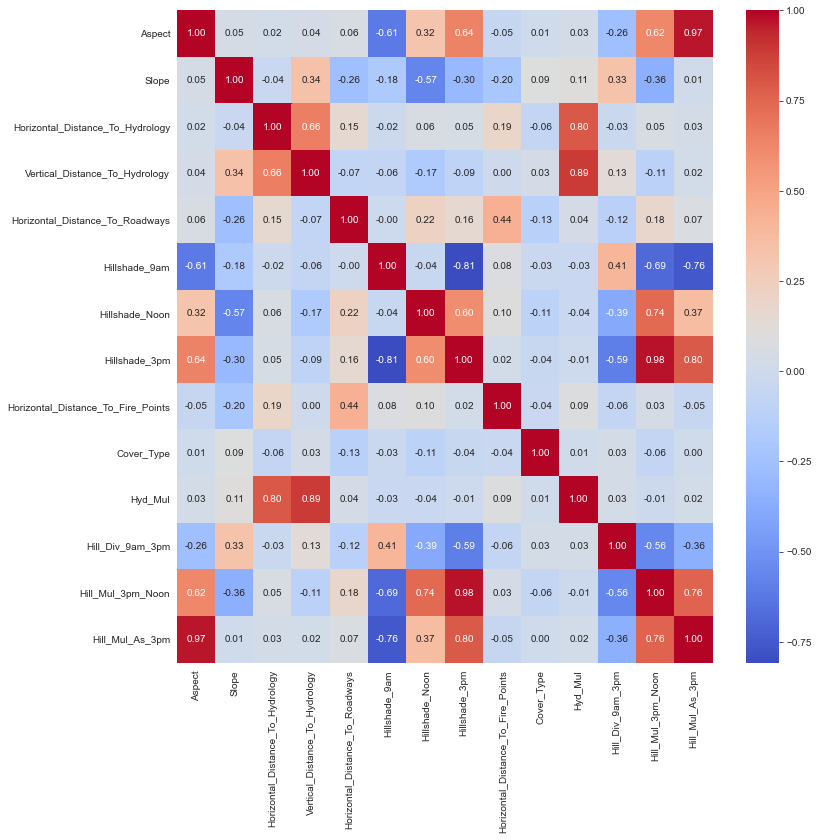

In [33]:
features.remove('Hill_Mul_As_Noon')
plt.figure(figsize = (12, 12))
sns.heatmap(train[features].corr(), fmt = '.2f', annot = True, cmap = 'coolwarm')

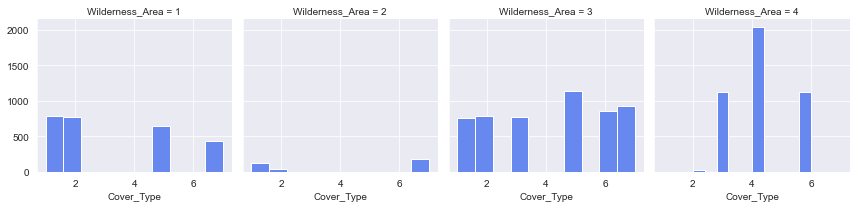

In [34]:
g = sns.FacetGrid(data = train, col = 'Wilderness_Area')
g = g.map(plt.hist, 'Cover_Type')

<AxesSubplot:xlabel='Aspect', ylabel='Hillshade_9am'>

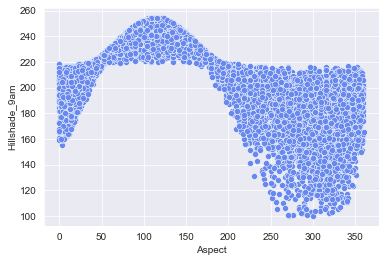

In [35]:
sns.scatterplot(x = 'Aspect', y = 'Hillshade_9am', data = train)

In [36]:
for df in data:
    df.drop('Hill_Mul_As_Noon', axis = 1, inplace = True)

In [37]:
train.drop(['Soil_Type', 'Wilderness_Area'], axis = 1, inplace = True)

In [55]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

train_c = train.copy()
test_c = test.copy()

for df in [train_c, test_c]:
    df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis = 1, inplace = True)

X_train, X_valid, y_train, y_valid = train_test_split(train_c, labels, random_state = 42, test_size = 0.2, shuffle = True)

In [39]:
params = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [-1, 5, 10, 15, 20, 25],
    'min_child_samples': [20, 40, 60, 80, 100, 120],
    'subsample': [1.0, 0.9, 0.8, 0.7, 0.6],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'num_leaves': [31, 60, 90]
}

lgb_clf = LGBMClassifier(n_estimators = 500,  random_state=42)
rnd_search = RandomizedSearchCV(lgb_clf, params, n_iter = 10, n_jobs = -1, cv = 5, random_state = 42, verbose = 100)
rnd_search.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = [(X_valid, y_valid)], verbose = 100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(n_estimators=500, random_state=42),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [-1, 5, 10, 15, 20, 25],
                                        'min_child_samples': [20, 40, 60, 80,
                                                              100, 120],
                                        'num_leaves': [31, 60, 90],
                                        'subsample': [1.0, 0.9, 0.8, 0.7, 0.6]},
                   random_state=42, verbose=100)

In [56]:
lgb_clf = rnd_search.best_estimator_
lgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = [(X_valid, y_valid)], verbose = False)

[1]	valid_0's multi_logloss: 1.6748
[2]	valid_0's multi_logloss: 1.50179
[3]	valid_0's multi_logloss: 1.3638
[4]	valid_0's multi_logloss: 1.26646
[5]	valid_0's multi_logloss: 1.17683
[6]	valid_0's multi_logloss: 1.10092
[7]	valid_0's multi_logloss: 1.03839
[8]	valid_0's multi_logloss: 0.985825
[9]	valid_0's multi_logloss: 0.940936
[10]	valid_0's multi_logloss: 0.901119
[11]	valid_0's multi_logloss: 0.866107
[12]	valid_0's multi_logloss: 0.835517
[13]	valid_0's multi_logloss: 0.80988
[14]	valid_0's multi_logloss: 0.785966
[15]	valid_0's multi_logloss: 0.764639
[16]	valid_0's multi_logloss: 0.744352
[17]	valid_0's multi_logloss: 0.728614
[18]	valid_0's multi_logloss: 0.71395
[19]	valid_0's multi_logloss: 0.698977
[20]	valid_0's multi_logloss: 0.686819
[21]	valid_0's multi_logloss: 0.675249
[22]	valid_0's multi_logloss: 0.66576
[23]	valid_0's multi_logloss: 0.65534
[24]	valid_0's multi_logloss: 0.645654
[25]	valid_0's multi_logloss: 0.637986
[26]	valid_0's multi_logloss: 0.631969
[27]	val

[213]	valid_0's multi_logloss: 0.505832
[214]	valid_0's multi_logloss: 0.505774
[215]	valid_0's multi_logloss: 0.50549
[216]	valid_0's multi_logloss: 0.505966
[217]	valid_0's multi_logloss: 0.506192
[218]	valid_0's multi_logloss: 0.506078
[219]	valid_0's multi_logloss: 0.506024
[220]	valid_0's multi_logloss: 0.506107
[221]	valid_0's multi_logloss: 0.506639
[222]	valid_0's multi_logloss: 0.507052
[223]	valid_0's multi_logloss: 0.507719
[224]	valid_0's multi_logloss: 0.507511
[225]	valid_0's multi_logloss: 0.507567
[226]	valid_0's multi_logloss: 0.507849
[227]	valid_0's multi_logloss: 0.507753
[228]	valid_0's multi_logloss: 0.508352
[229]	valid_0's multi_logloss: 0.50848
[230]	valid_0's multi_logloss: 0.508822
[231]	valid_0's multi_logloss: 0.509038
[232]	valid_0's multi_logloss: 0.509979
[233]	valid_0's multi_logloss: 0.510673
[234]	valid_0's multi_logloss: 0.511218
[235]	valid_0's multi_logloss: 0.510972
[236]	valid_0's multi_logloss: 0.510955
[237]	valid_0's multi_logloss: 0.510839
[2

LGBMClassifier(colsample_bytree=0.9, max_depth=25, min_child_samples=60,
               n_estimators=500, random_state=42, subsample=0.6)

In [57]:
lgb_clf.score(X_valid, y_valid)

0.8040702314445332

<AxesSubplot:>

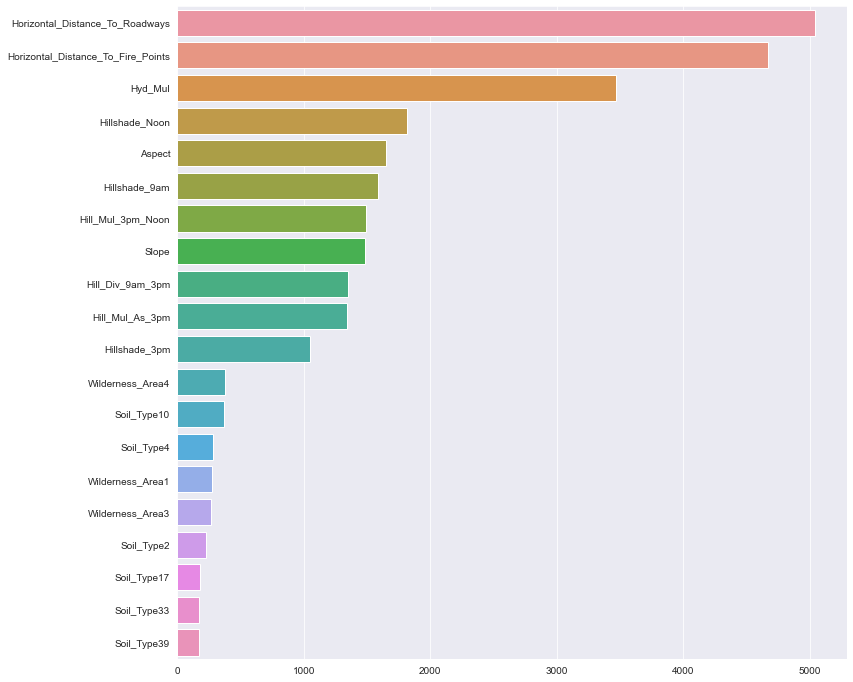

In [66]:
columns = train.columns.tolist()
columns.remove('Vertical_Distance_To_Hydrology')
columns.remove('Horizontal_Distance_To_Hydrology')
temp = pd.Series(data = lgb_clf.feature_importances_, index = columns).sort_values(ascending = False)[:20]
plt.figure(figsize = (12, 12))
sns.barplot(x = temp, y = temp.index)

In [43]:
# for df in data:
#     df.drop('Hill_Mul_As_3pm', axis = 1, inplace = True)
# X_train, X_valid, y_train, y_valid = train_test_split(train, labels, random_state = 42, test_size = 0.2, shuffle = True)
# lgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_set = [(X_train, y_train)])
# temp = pd.Series(data = lgb_clf.feature_importances_, index = train.columns).sort_values(ascending=False)
# sns.barplot(x = temp, y = temp.index)

In [68]:
predict = lgb_clf.predict(test_c)

In [69]:
data = pd.DataFrame({'Id': test_id, 'Cover_Type': predict})
data.to_csv('ForestCoverType2.csv', index = False)